In [5]:
from cfl.experiment import Experiment
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from cfl_helpers import *

In [6]:
resolution = '40km'
file = f'data/{resolution}_data.csv'

data = pd.read_csv(file)
Xraw = np.array(data[['lat', 'long']])
Yraw = np.array(data['generated_temp']).reshape(-1,1)
X = StandardScaler().fit_transform(Xraw)
Y = StandardScaler().fit_transform(Yraw)

true_alt, true_temps = get_alt_temp_grids(data)

# Trying R2 and adjusted R2 formula (should penalize excessive clusters)

In [7]:
data_info = {'X_dims' : X.shape,
             'Y_dims' : Y.shape,
             'Y_type' : 'continuous' #options: 'categorical' or 'continuous'
            }

CDE_params = {  'model'        : 'CondExpMod',
                'model_params' : {
                    # model architecture
                    'dense_units' : [50, data_info['Y_dims'][1]],
                    'activations' : ['relu', 'linear'],
                    'dropouts'    : [0, 0],
                    # training parameters
                    'batch_size'  : 64,
                    'n_epochs'    : 2000,
                    'optimizer'   : 'adam',
                    'opt_config'  : {'lr' : 1e-4},
                    'loss'        : 'mean_squared_error',
                    'best'        : True,
                    'early_stopping' : True,
                    # verbosity
                    'verbose'     : 0, # don't log or show plot for checking clusters vs accuracy
                    'show_plot'   : False,
                }
}

# CAUSE CLUSTER PARAMS VARIED

In [8]:
n_clusters = [5, 10, 25, 50, 75, 100, 150, 200]
adj_r2_accuracies = []
r2_accuracies = []

for n in n_clusters:
    cause_cluster_params =  {'model' : 'KMeans',
                         'model_params' : {'n_clusters' : n},
                         'verbose' : 0
    }

    block_names = ['CondDensityEstimator', 'CauseClusterer']
    block_params = [CDE_params, cause_cluster_params]
    results_path = 'sample_run' # directory to save results to

    my_exp = Experiment(X_train=X,
                        Y_train=Y,
                        data_info=data_info,
                        block_names=block_names,
                        block_params=block_params,
                        results_path=results_path)
    results = my_exp.train()

    xlbls = results['CauseClusterer']['x_lbls']
    pred_alts = reconstruct_groups(data, xlbls, plot=False)

    adj_r2_accuracies.append(adjusted_r2(true_alt, pred_alts, n_clusters=n))
    r2_accuracies.append(r2(true_alt, pred_alts))
    print(f"Adjusted R2 for {n} clusters: {adj_r2_accuracies[-1]}")
    print(f"R2 for {n} clusters: {r2_accuracies[-1]}")

All results from this run will be saved to sample_run/experiment0041
Block: verbose not specified in input, defaulting to 1
#################### Beginning CFL Experiment training. ####################
Beginning CondDensityEstimator training...
27/27 [==============================] - 0s 1ms/step
CondDensityEstimator training complete.
Beginning CauseClusterer training...
CauseClusterer training complete.
Experiment training complete.
Adjusted R2 for 5 clusters: 0.5618526204249135
R2 for 5 clusters: 0.5644857176579369
All results from this run will be saved to sample_run/experiment0042
#################### Beginning CFL Experiment training. ####################
Beginning CondDensityEstimator training...
27/27 [==============================] - 0s 1ms/step
CondDensityEstimator training complete.
Beginning CauseClusterer training...
CauseClusterer training complete.
Experiment training complete.
Adjusted R2 for 10 clusters: 0.6321045809436434
R2 for 10 clusters: 0.6365264008842246
All res

Text(0.5, 1.0, 'Adjusted R2 accuracies vs number of clusters - 40km')

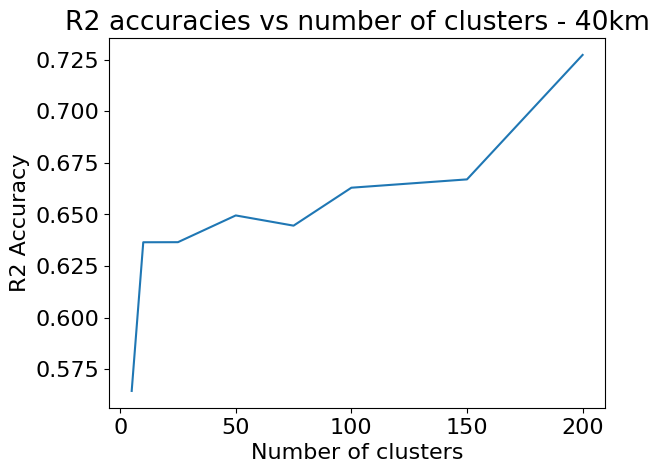

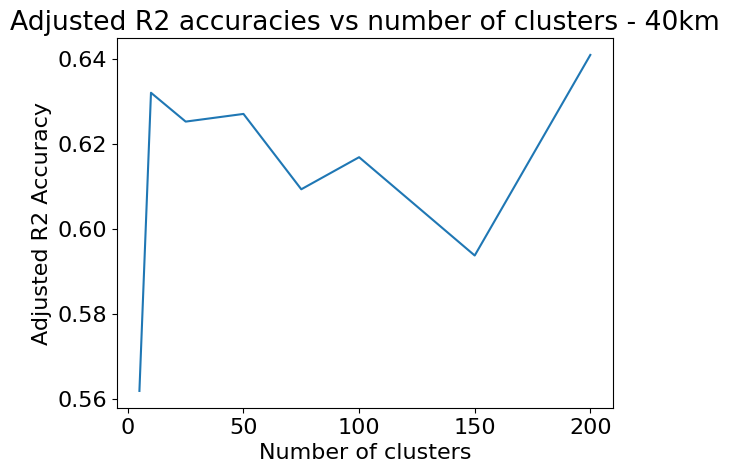

In [9]:
import matplotlib.pyplot as plt

plt.figure(0)
plt.plot(n_clusters, r2_accuracies)
plt.xlabel('Number of clusters')
plt.ylabel('R2 Accuracy')
plt.title(f'R2 accuracies vs number of clusters - {resolution}')

plt.figure(1)
plt.plot(n_clusters, adj_r2_accuracies)
plt.xlabel('Number of clusters')
plt.ylabel('Adjusted R2 Accuracy')
plt.title(f'Adjusted R2 accuracies vs number of clusters - {resolution}')

# trying different range

In [11]:
n_clusters = [3, 5, 7, 10, 15, 25, 50, 75, 100]
adj_r2_accuracies = []
r2_accuracies = []

for n in n_clusters:
    cause_cluster_params =  {'model' : 'KMeans',
                         'model_params' : {'n_clusters' : n},
                         'verbose' : 0
    }

    block_names = ['CondDensityEstimator', 'CauseClusterer']
    block_params = [CDE_params, cause_cluster_params]
    results_path = 'sample_run' # directory to save results to

    my_exp = Experiment(X_train=X,
                        Y_train=Y,
                        data_info=data_info,
                        block_names=block_names,
                        block_params=block_params,
                        results_path=results_path)
    results = my_exp.train()

    xlbls = results['CauseClusterer']['x_lbls']
    pred_alts = reconstruct_groups(data, xlbls, plot=False)

    adj_r2_accuracies.append(adjusted_r2(true_alt, pred_alts, n_clusters=n))
    r2_accuracies.append(r2(true_alt, pred_alts))
    print(f"Adjusted R2 for {n} clusters: {adj_r2_accuracies[-1]}")
    print(f"R2 for {n} clusters: {r2_accuracies[-1]}")

All results from this run will be saved to sample_run/experiment0054
#################### Beginning CFL Experiment training. ####################
Beginning CondDensityEstimator training...
27/27 [==============================] - 0s 1ms/step
CondDensityEstimator training complete.
Beginning CauseClusterer training...
CauseClusterer training complete.
Experiment training complete.
Adjusted R2 for 3 clusters: 0.5151777813401814
R2 for 3 clusters: 0.5169259383786182
All results from this run will be saved to sample_run/experiment0055
#################### Beginning CFL Experiment training. ####################
Beginning CondDensityEstimator training...
27/27 [==============================] - 0s 1ms/step
CondDensityEstimator training complete.
Beginning CauseClusterer training...
CauseClusterer training complete.
Experiment training complete.
Adjusted R2 for 5 clusters: 0.5622514691255573
R2 for 5 clusters: 0.5648821694312932
All results from this run will be saved to sample_run/experiment

Text(0.5, 1.0, 'Adjusted R2 accuracies vs number of clusters - 40km')

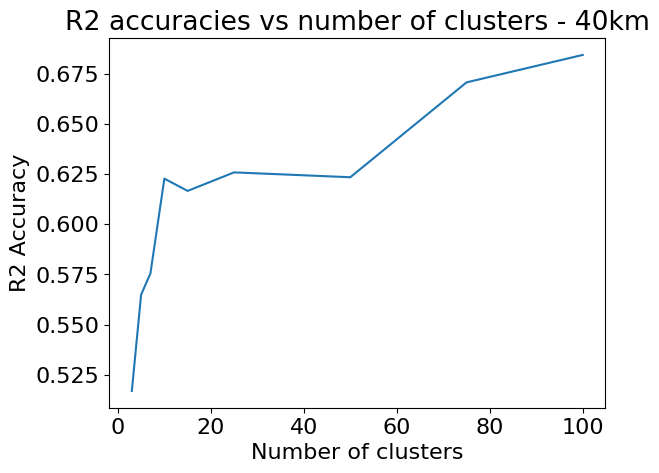

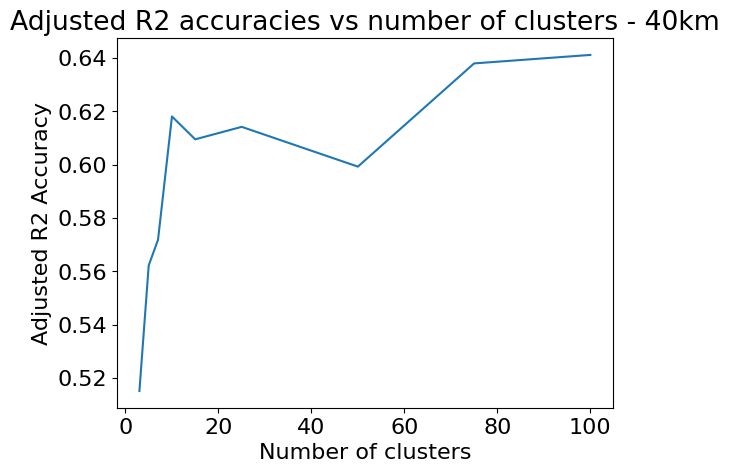

In [12]:
import matplotlib.pyplot as plt

plt.figure(0)
plt.plot(n_clusters, r2_accuracies)
plt.xlabel('Number of clusters')
plt.ylabel('R2 Accuracy')
plt.title(f'R2 accuracies vs number of clusters - {resolution}')

plt.figure(1)
plt.plot(n_clusters, adj_r2_accuracies)
plt.xlabel('Number of clusters')
plt.ylabel('Adjusted R2 Accuracy')
plt.title(f'Adjusted R2 accuracies vs number of clusters - {resolution}')